In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [3]:
def continued_fraction(x, terms):
    val = x
    for i in range(terms):
        if i == terms-1:
            val = 1/(1-val)
        else:
            val = x/(1-val)
        # print(val)
    return val

In [8]:
def continued_exp(x, terms):
    val = 1
    for i in range(terms):
        val = np.exp(val*x)
        # print(val)
    return val

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in cdouble_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in exp
  after removing the cwd from sys.path.


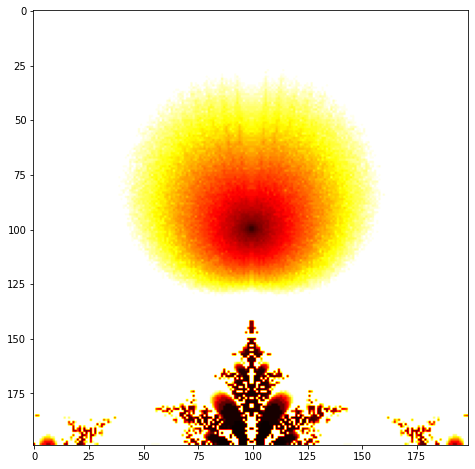

In [9]:
N = 199
conv = 50
df = 0.01
s = np.zeros((N,N))
pt = np.zeros((conv,),dtype=np.complex_)
for x in range(N):
    for y in range(N):
        dx = x * df - N * df/2
        dy = y * df - N * df/2
        for i in range(conv):
            pt[i] = continued_exp(dx+dy*1j, i)
        s[x,y] = np.unique(np.array(pt)).size

plt.figure(figsize=(8,8))
plt.set_cmap('hot')
plt.imshow(s)

In [1]:
!nvidia-smi

Fri Jul 30 18:47:21 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import cmath
import math
from numba import cuda

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:58: RuntimeWarning:

overflow encountered in multiply



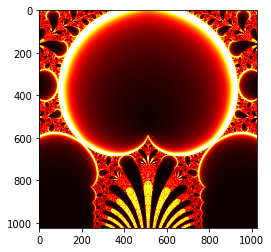

In [ ]:
@cuda.jit
def number_of_LP(N, conv, pt, df, fst_x, fst_y):
    bwx = cuda.blockDim.x
    bId_x = bwx * cuda.blockIdx.x
    bwy = cuda.blockDim.y
    bId_y = bwy * cuda.blockIdx.y
    tx = cuda.threadIdx.x + bId_x
    ty = cuda.threadIdx.y + bId_y
     
    
    dx = tx * df + fst_x
    dy = ty * df + fst_y
    z = dx+dy*1j
    for terms in range(conv):
    
        val = 1
        for k in range(10000,10000+terms):
            val = cmath.exp(val*z)
        pt[tx, ty, terms] = val


    


n = 1024
N = 64
conv = 300
df = 0.005
# s = np.zeros((N,N))
pt = np.zeros((N, N, conv), dtype=np.complex64)
# s[x,y] = np.unique(np.array(pt)).size
threadsperblock = (32, 32)
blockspergrid_x = math.ceil(N / threadsperblock[0])
blockspergrid_y = math.ceil(N / threadsperblock[1])
blockspergrid = (blockspergrid_x, blockspergrid_y)
cp = np.zeros((n,n))

for fx in range(n//N):
    for fy in range(n//N):
        ofst_x = fx * N * df - n * df/2
        ofst_y = fy * N * df - n * df/2
        number_of_LP[blockspergrid, threadsperblock](N, conv, pt, df, ofst_x, ofst_y)
        for i in range(N):
            for j in range(N):
                cp[i+N*fx,j+N*fy] = np.unique(np.round(pt.reshape(N,N, conv)[i,j,:],decimals=4)).size


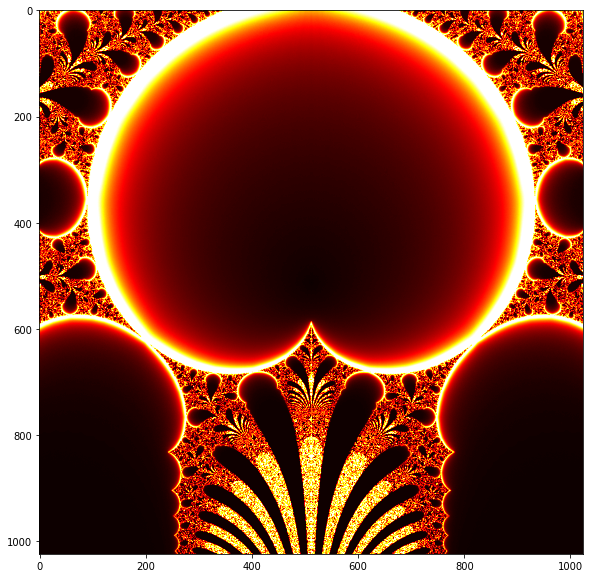

In [ ]:
plt.figure(figsize = (10,10))
plt.set_cmap('hot')

plt.imshow(cp)
plt.show()

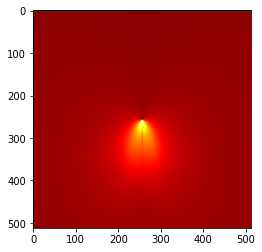

In [ ]:
import math
@cuda.jit
def number_of_LP(N, conv, pt, df, fst_x, fst_y):
    bwx = cuda.blockDim.x
    bId_x = bwx * cuda.blockIdx.x
    bwy = cuda.blockDim.y
    bId_y = bwy * cuda.blockIdx.y
    tx = cuda.threadIdx.x + bId_x
    ty = cuda.threadIdx.y + bId_y
     
    
    dx = tx * df + fst_x
    dy = ty * df + fst_y
    z = dx+dy*1j
    for terms in range(conv):
        # pt[index, i] = continued_exp(dx+dy*1j, i)
        
        val = z
        for i in range(terms):
            if i == terms-1:
                val = 1/(1-val)
            else:
                val = z/(1-val)
        pt[tx, ty, terms] = val


    


n = 512

N = 64
conv = 1000
df = 1000

# s = np.zeros((N,N))
pt = np.zeros((N, N, conv), dtype=np.complex64)
# s[x,y] = np.unique(np.array(pt)).size
threadsperblock = (32, 32)
blockspergrid_x = math.ceil(N / threadsperblock[0])
blockspergrid_y = math.ceil(N / threadsperblock[1])
blockspergrid = (blockspergrid_x, blockspergrid_y)
cp = np.zeros((n,n))

for fx in range(n//N):
    for fy in range(n//N):
        ofst_x = fx * N * df - n * df/2 
        ofst_y = fy * N * df - n * df/2
        number_of_LP[blockspergrid, threadsperblock](N, conv, pt, df, ofst_x, ofst_y)
        for i in range(N):
            for j in range(N):
                cp[i+N*fx,j+N*fy] = np.unique(np.round(pt.reshape(N,N, conv)[i,j,:],decimals=4)).size
plt.imshow(cp)
plt.show()

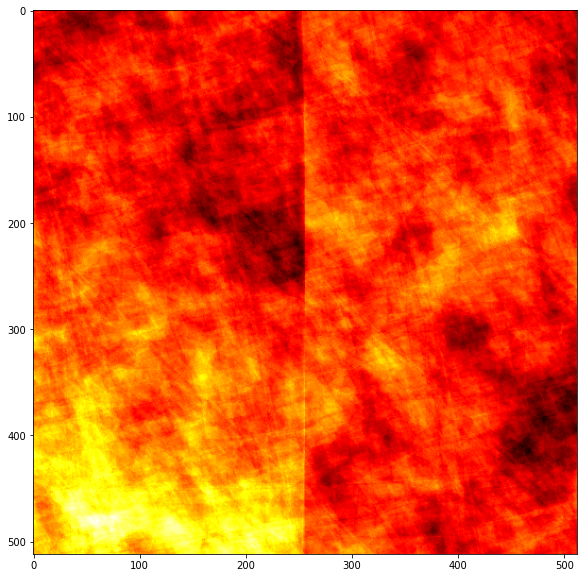

In [ ]:
plt.figure(figsize = (10,10))
plt.set_cmap('hot')

plt.imshow(cp)
plt.show()